# Final project task 2 - Census EDA

Requirements

- Analyze hours-per-week Target Distribution **1p**
    - Provide visualizations like histograms or density plots for hours-per-week to assess its distribution, outliers, and skewness.

- Provide a summary of the dataset using descriptive statistics, such as mean, median, and standard deviation. **1p**

- Check for missing values and report the number and percentage of missing data for each column. **1p**

- Identify outliers in at least one numerical column using boxplots. **1p**

- Write a summary report of your findings from the EDA, highlighting key patterns or trends, unexpected insights or anomalies, and areas requiring further investigation. **1p**


- Plot histograms for at least three numerical columns and discuss their distributions, such as skewness and modality. - Optional

- Generate bar plots for at least three categorical columns and discuss the frequency distributions. - Optional

- Create a correlation matrix for target hours-per-week and the rest of numerical variables and discuss the strongest and weakest correlations with the target. - Optional

- Explore relationships between at least one numerical variable and hours-per-week target using scatter plots and identify any visible trends. Choose the variable that is/are most correlated with hours-per-week. - Optional

- Analyze the relationship between hours-per-week and all categorical variable using boxplots or violin plots. - Optional

- At the end, do the same analysis for the preprocessed dataset (just change the input data in the EDA), and write a report. - Optional

- Others? - Optional


Deliverable:

- Notebook code with no errors.
- Include all visuals from the requirements in the notebook: graphs, plots, histograms, heatmap etc
- Be sure to discuss the findings and add a summary report

## 1. Data exploration

This section examines the dataset structure and basic information to understand the data.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Set plotting style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

In [2]:
import pandas as pd

In [3]:
data_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
columns = [
    "age", "workclass", "fnlwgt", "education", "education-num", "marital-status",
    "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss",
    "hours-per-week", "native-country", "income"
]

data = pd.read_csv(data_url, header=None, names=columns, na_values=[" ?", "?"], skipinitialspace=True)
data.sample(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
30049,56,Federal-gov,187873,Masters,14,Divorced,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
15448,28,Private,328949,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,60,United-States,<=50K
27588,20,Private,204641,Some-college,10,Never-married,Other-service,Own-child,White,Male,0,0,40,United-States,<=50K
16929,26,Private,188626,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,48,United-States,<=50K
24669,50,Private,279461,Some-college,10,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States,>50K
14767,39,Private,139906,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,0,81,United-States,<=50K
29136,50,Federal-gov,343014,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,40,United-States,<=50K
14578,26,NaN,133373,Bachelors,13,Never-married,NaN,Own-child,White,Male,0,0,44,United-States,<=50K
6221,34,Private,316470,Some-college,10,Never-married,Adm-clerical,Not-in-family,White,Male,0,0,40,United-States,<=50K
476,17,Private,211870,9th,5,Never-married,Other-service,Not-in-family,White,Male,0,0,6,United-States,<=50K


In [4]:
# Dataset overview
print("Dataset Shape:", data.shape)
print("\nColumn Names:")
print(data.columns.tolist())
print("\nData Types:")
print(data.dtypes)

Dataset Shape: (32561, 15)

Column Names:
['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']

Data Types:
age               int64
workclass           str
fnlwgt            int64
education           str
education-num     int64
marital-status      str
occupation          str
relationship        str
race                str
sex                 str
capital-gain      int64
capital-loss      int64
hours-per-week    int64
native-country      str
income              str
dtype: object


In [5]:
# Display first few rows
data.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


 The dataset contains both numerical and categorical features. Numerical features include `age`, `fnlwgt`, `education-num`, `capital-gain`, `capital-loss`, and our target `hours-per-week`. Categorical features include `workclass`, `education`, `marital-status`, `occupation`, `relationship`, `race`, `sex`, and `native-country`.

## 2. Target variable analysis (hours-per-week)

This section analyzes the distribution of the target variable using visualizations to assess distribution shape, outliers, and skewness.

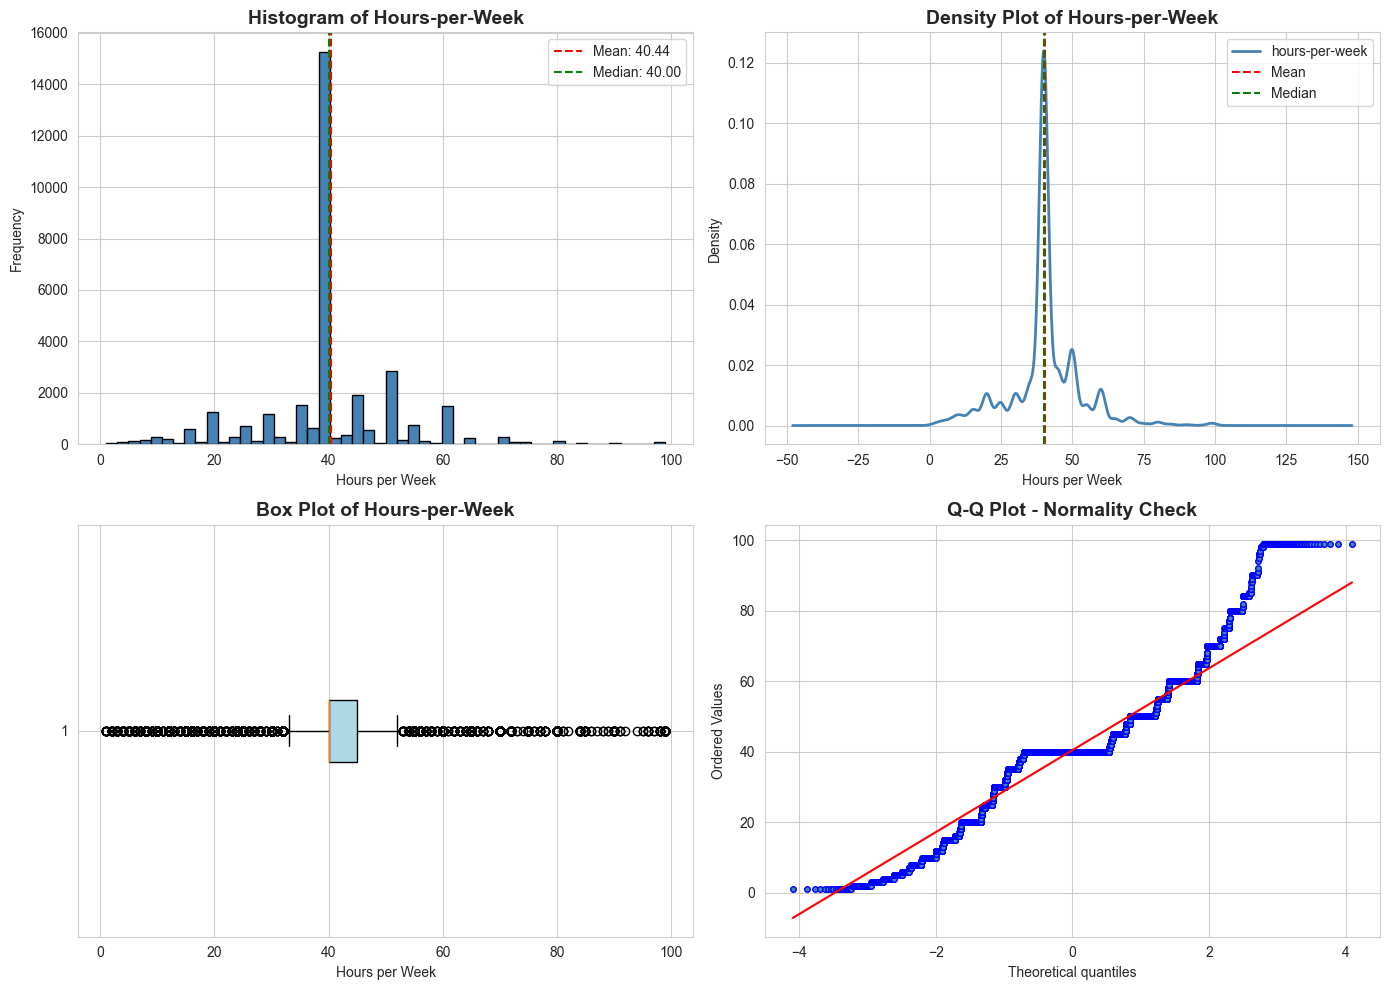


=== TARGET VARIABLE STATISTICS ===
Mean: 40.44
Median: 40.00
Mode: 40.00
Standard Deviation: 12.35
Skewness: 0.23
Kurtosis: 2.92
Min: 1.00
Max: 99.00


In [6]:
# Target variable distribution analysis
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Histogram
axes[0, 0].hist(data['hours-per-week'].dropna(), bins=50, color='steelblue', edgecolor='black')
axes[0, 0].set_title('Histogram of Hours-per-Week', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Hours per Week')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].axvline(data['hours-per-week'].mean(), color='red', linestyle='--', label=f'Mean: {data["hours-per-week"].mean():.2f}')
axes[0, 0].axvline(data['hours-per-week'].median(), color='green', linestyle='--', label=f'Median: {data["hours-per-week"].median():.2f}')
axes[0, 0].legend()

# Density plot (KDE)
data['hours-per-week'].dropna().plot(kind='density', ax=axes[0, 1], color='steelblue', linewidth=2)
axes[0, 1].set_title('Density Plot of Hours-per-Week', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('Hours per Week')
axes[0, 1].set_ylabel('Density')
axes[0, 1].axvline(data['hours-per-week'].mean(), color='red', linestyle='--', label=f'Mean')
axes[0, 1].axvline(data['hours-per-week'].median(), color='green', linestyle='--', label=f'Median')
axes[0, 1].legend()

# Box plot
axes[1, 0].boxplot(data['hours-per-week'].dropna(), vert=False, patch_artist=True,
                    boxprops=dict(facecolor='lightblue'))
axes[1, 0].set_title('Box Plot of Hours-per-Week', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('Hours per Week')

# Q-Q plot for normality assessment
stats.probplot(data['hours-per-week'].dropna(), dist="norm", plot=axes[1, 1])
axes[1, 1].set_title('Q-Q Plot - Normality Check', fontsize=14, fontweight='bold')
axes[1, 1].get_lines()[0].set_markerfacecolor('steelblue')
axes[1, 1].get_lines()[0].set_markersize(4)

plt.tight_layout()
plt.show()

# Statistical summary
print("\n=== TARGET VARIABLE STATISTICS ===")
print(f"Mean: {data['hours-per-week'].mean():.2f}")
print(f"Median: {data['hours-per-week'].median():.2f}")
print(f"Mode: {data['hours-per-week'].mode()[0]:.2f}")
print(f"Standard Deviation: {data['hours-per-week'].std():.2f}")
print(f"Skewness: {data['hours-per-week'].skew():.2f}")
print(f"Kurtosis: {data['hours-per-week'].kurtosis():.2f}")
print(f"Min: {data['hours-per-week'].min():.2f}")
print(f"Max: {data['hours-per-week'].max():.2f}")

 The target variable shows a multimodal distribution with a strong peak at 40 hours (standard full-time), indicating most individuals work regular full-time schedules. The distribution has positive skewness (0.23), with the mean (40.4) slightly higher than the median (40.0). The Q-Q plot reveals deviations from normality, particularly at the tails, confirming the presence of multiple modes. Outliers exist on both ends, with some individuals working very few hours (minimum 1) or excessive hours (maximum 99), suggesting diverse employment patterns ranging from part-time to overworked individuals.

## 3. Descriptive statistics summary

This section provides comprehensive descriptive statistics (mean, median, standard deviation, quartiles) for all numerical columns.

In [7]:
# Descriptive statistics for all numerical columns
print("=== DESCRIPTIVE STATISTICS FOR NUMERICAL FEATURES ===\n")
descriptive_stats = data.describe().T
descriptive_stats['median'] = data.median(numeric_only=True)
descriptive_stats['skewness'] = data.skew(numeric_only=True)
descriptive_stats['kurtosis'] = data.kurtosis(numeric_only=True)

# Reorder columns for better readability
descriptive_stats = descriptive_stats[['count', 'mean', 'median', 'std', 'min', '25%', '50%', '75%', 'max', 'skewness', 'kurtosis']]
descriptive_stats

=== DESCRIPTIVE STATISTICS FOR NUMERICAL FEATURES ===



,count,mean,median,std,min,25%,50%,75%,max,skewness,kurtosis
age,32561.0,38.581647,37.0,13.640433,17.0,28.0,37.0,48.0,90.0,0.558743,-0.166127
fnlwgt,32561.0,189778.366512,178356.0,105549.977697,12285.0,117827.0,178356.0,237051.0,1484705.0,1.446980,6.218811
education-num,32561.0,10.080679,10.0,2.572720,1.0,9.0,10.0,12.0,16.0,-0.311676,0.623444
capital-gain,32561.0,1077.648844,0.0,7385.292085,0.0,0.0,0.0,0.0,99999.0,11.953848,154.799438
capital-loss,32561.0,87.303830,0.0,402.960219,0.0,0.0,0.0,0.0,4356.0,4.594629,20.376802
hours-per-week,32561.0,40.437456,40.0,12.347429,1.0,40.0,40.0,45.0,99.0,0.227643,2.916687


**Statistical insights:**
- **Age**: Mean age is ~38.6 years with std ~13.6, ranging from 17 to 90. Slight right skew (0.56) indicates more younger individuals.
- **fnlwgt** (final weight): Highly variable (std ~106k) with extreme outliers, representing population sampling weights.
- **education-num**: Mean ~10 years with distribution concentrated between 9-13 years (high school to bachelor's).
- **capital-gain/loss**: Highly skewed distributions (capital-gain skewness ~11.95, capital-loss ~4.59) with most values at 0, indicating sparse capital income/losses. These features may need special treatment (log transform or separate handling of zeros).
- **hours-per-week**: Mean ~40.4 hours (full-time work) with positive skew (0.23), confirming earlier observation of right-skewed distribution.

## 4. Missing values analysis

This section checks for missing values and reports both count and percentage for each column.

=== MISSING VALUES REPORT ===

        Column  Missing_Count  Missing_Percentage
    occupation           1843                5.66
     workclass           1836                5.64
native-country            583                1.79
        fnlwgt              0                0.00
     education              0                0.00
 education-num              0                0.00
           age              0                0.00
marital-status              0                0.00
  relationship              0                0.00
           sex              0                0.00
          race              0                0.00
  capital-gain              0                0.00
  capital-loss              0                0.00
hours-per-week              0                0.00
        income              0                0.00


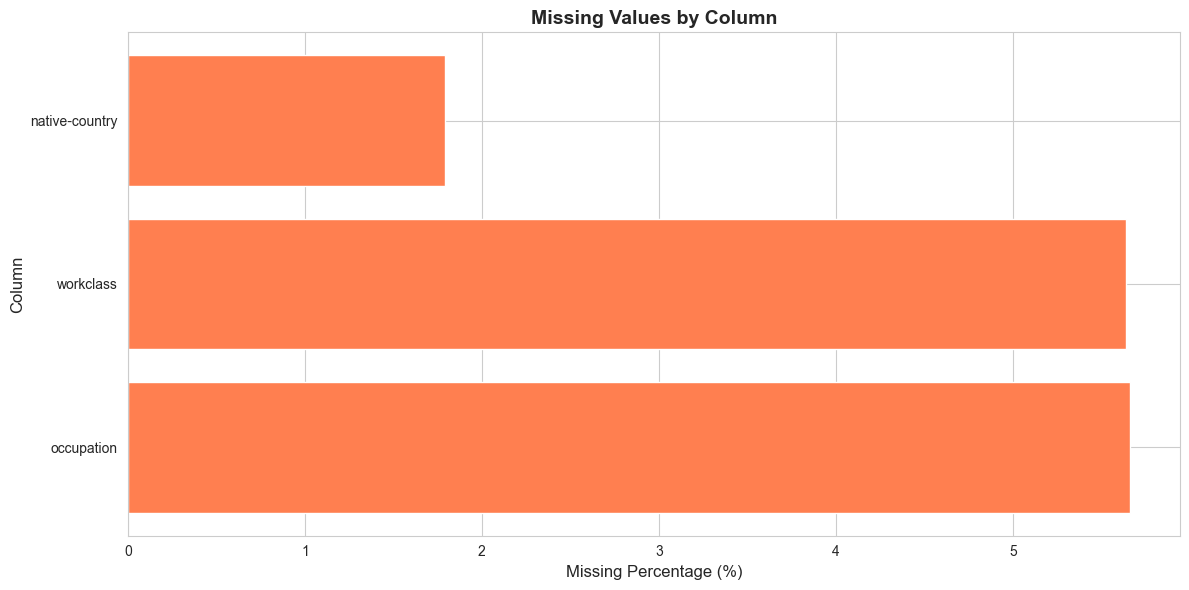

In [8]:
# Missing values analysis
missing_values = pd.DataFrame({
    'Column': data.columns,
    'Missing_Count': data.isnull().sum().values,
    'Missing_Percentage': (data.isnull().sum().values / len(data) * 100).round(2)
})

# Sort by missing count descending
missing_values = missing_values.sort_values('Missing_Count', ascending=False)

print("=== MISSING VALUES REPORT ===\n")
print(missing_values.to_string(index=False))

# Visualize missing values
plt.figure(figsize=(12, 6))
missing_cols = missing_values[missing_values['Missing_Count'] > 0]
if len(missing_cols) > 0:
    plt.barh(missing_cols['Column'], missing_cols['Missing_Percentage'], color='coral')
    plt.xlabel('Missing Percentage (%)', fontsize=12)
    plt.ylabel('Column', fontsize=12)
    plt.title('Missing Values by Column', fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.show()
else:
    print("\nNo missing values found in the dataset!")

 The dataset reveals missing values in three categorical features. The missing data appears in **workclass** (5.64% missing), **occupation** (5.66% missing), and **native-country** (1.79% missing). These missing values are originally coded as "?" in the raw dataset and represent cases where survey respondents did not provide information. All numerical features (age, fnlwgt, education-num, capital-gain, capital-loss, hours-per-week) have no missing values. The presence of missing data in employment-related fields (workclass, occupation) suggests these may be individuals not in the active workforce. **Note**: In Task 1 preprocessing, these missing values were handled through mode imputation for all categorical features, resulting in a complete dataset with no missing values.

## 5. Outlier detection using boxplots

This section identifies outliers in numerical columns using boxplots to visualize extreme values beyond 1.5 × IQR.

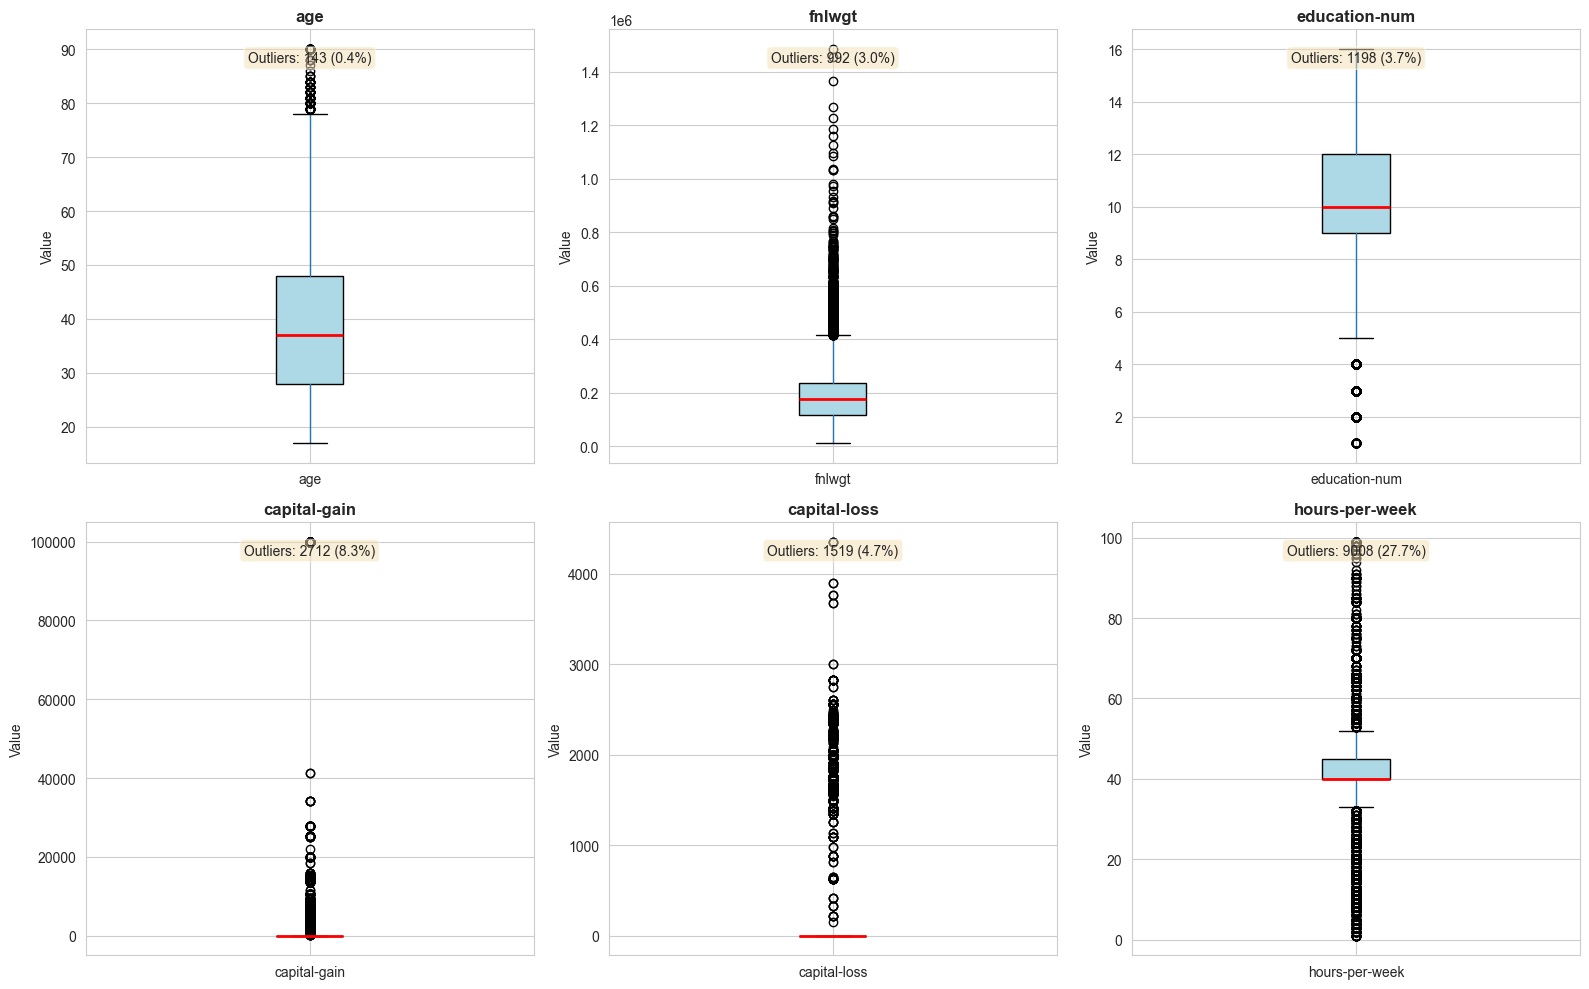

In [9]:
# Select numerical columns (excluding income which is categorical)
numerical_cols = data.select_dtypes(include=[np.number]).columns.tolist()

# Create boxplots for all numerical features
fig, axes = plt.subplots(2, 3, figsize=(16, 10))
axes = axes.ravel()

for idx, col in enumerate(numerical_cols):
    data.boxplot(column=col, ax=axes[idx], patch_artist=True,
                 boxprops=dict(facecolor='lightblue'),
                 medianprops=dict(color='red', linewidth=2))
    axes[idx].set_title(f'{col}', fontsize=12, fontweight='bold')
    axes[idx].set_ylabel('Value')
    
    # Calculate outlier statistics
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)][col]
    outlier_pct = (len(outliers) / len(data)) * 100
    
    axes[idx].text(0.5, 0.95, f'Outliers: {len(outliers)} ({outlier_pct:.1f}%)', 
                   transform=axes[idx].transAxes, ha='center', va='top',
                   bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.tight_layout()
plt.show()

Boxplot analysis reveals significant outliers across all numerical features. **capital-gain** and **capital-loss** show the most extreme outlier patterns (8.33% and 4.67% respectively), with most values at zero but some extremely high values indicating concentrated wealth/losses. **age** has 0.44% outliers on the upper end (older individuals beyond 78), while **hours-per-week** has 27.66% outliers representing individuals working unusual hours (very short part-time or excessive overtime beyond the 32.5-52.5 hour typical range). **fnlwgt** sampling weights show high variability with 3.05% outliers. **education-num** has 3.68% outliers (education levels below 4 years). These outliers represent genuine data patterns rather than errors and should be handled appropriately during modeling (potentially through transformation or robust algorithms).

In [10]:
# Detailed outlier analysis for each numerical column
print("=== DETAILED OUTLIER ANALYSIS ===\n")

for col in numerical_cols:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)][col]
    
    print(f"{col}:")
    print(f"  Q1 = {Q1:.2f}, Q3 = {Q3:.2f}, IQR = {IQR:.2f}")
    print(f"  Bounds: [{lower_bound:.2f}, {upper_bound:.2f}]")
    print(f"  Outliers: {len(outliers)} ({len(outliers)/len(data)*100:.2f}%)")
    if len(outliers) > 0:
        print(f"  Range: {outliers.min():.2f} to {outliers.max():.2f}")
    print()

=== DETAILED OUTLIER ANALYSIS ===

age:
  Q1 = 28.00, Q3 = 48.00, IQR = 20.00
  Bounds: [-2.00, 78.00]
  Outliers: 143 (0.44%)
  Range: 79.00 to 90.00

fnlwgt:
  Q1 = 117827.00, Q3 = 237051.00, IQR = 119224.00
  Bounds: [-61009.00, 415887.00]
  Outliers: 992 (3.05%)
  Range: 415913.00 to 1484705.00

education-num:
  Q1 = 9.00, Q3 = 12.00, IQR = 3.00
  Bounds: [4.50, 16.50]
  Outliers: 1198 (3.68%)
  Range: 1.00 to 4.00

capital-gain:
  Q1 = 0.00, Q3 = 0.00, IQR = 0.00
  Bounds: [0.00, 0.00]
  Outliers: 2712 (8.33%)
  Range: 114.00 to 99999.00

capital-loss:
  Q1 = 0.00, Q3 = 0.00, IQR = 0.00
  Bounds: [0.00, 0.00]
  Outliers: 1519 (4.67%)
  Range: 155.00 to 4356.00

hours-per-week:
  Q1 = 40.00, Q3 = 45.00, IQR = 5.00
  Bounds: [32.50, 52.50]
  Outliers: 9008 (27.66%)
  Range: 1.00 to 99.00



## 6. Numerical features distribution analysis

This section analyzes distribution patterns (skewness, modality) for key numerical features through histograms.

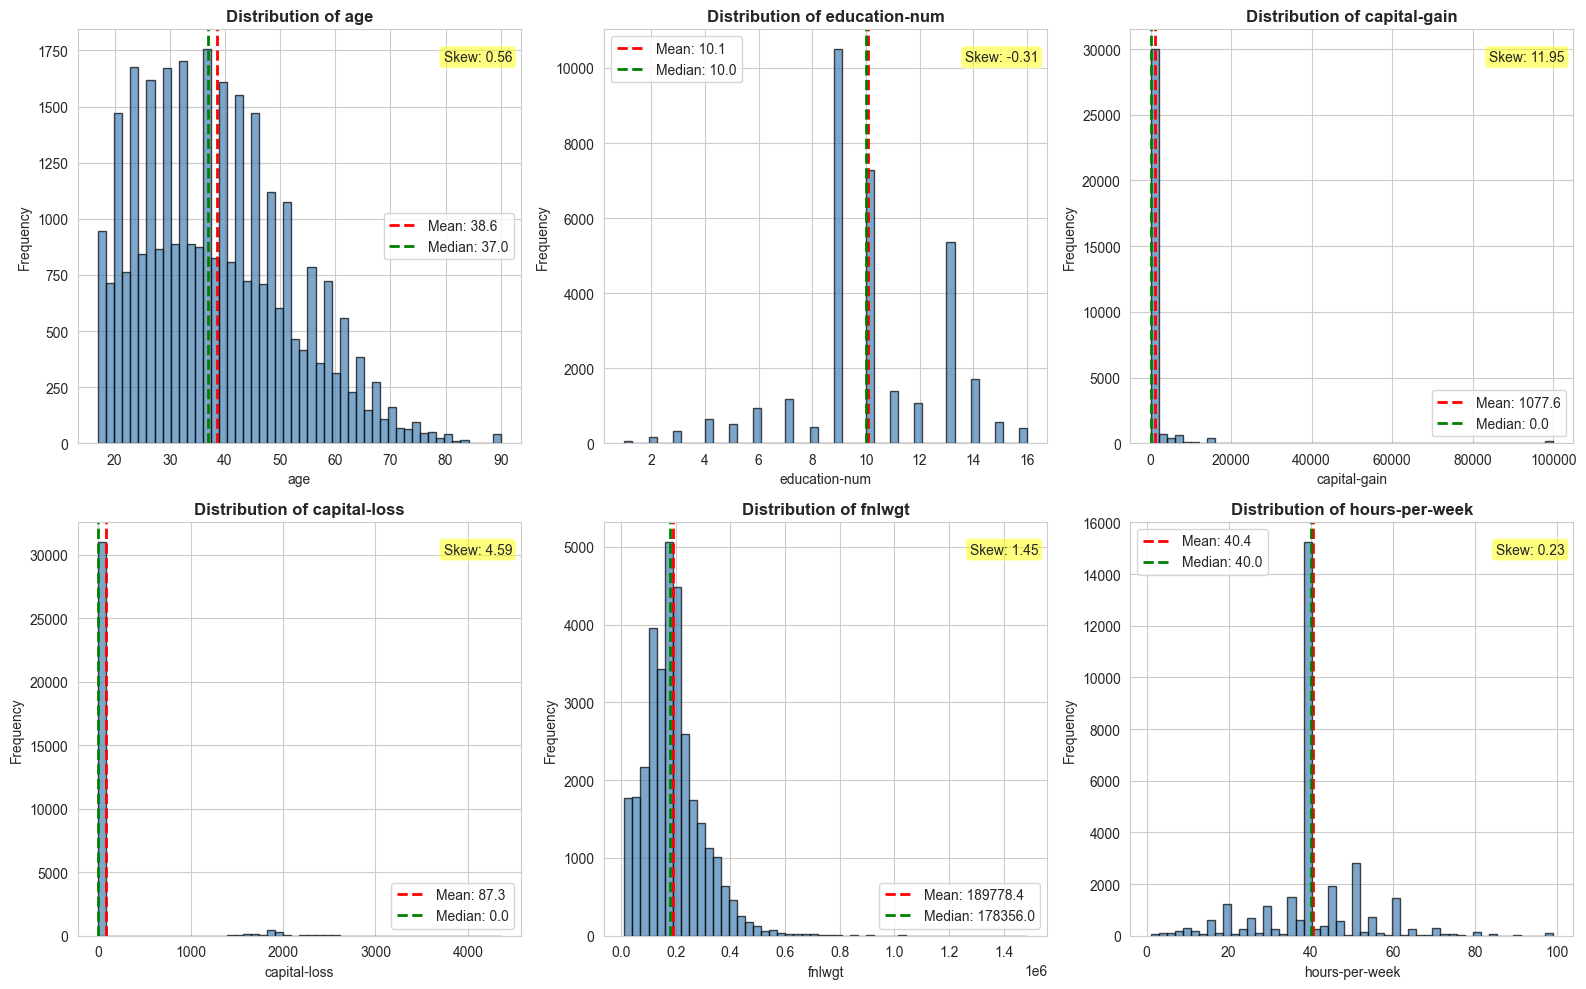

In [11]:
# Plot histograms for key numerical features
fig, axes = plt.subplots(2, 3, figsize=(16, 10))
axes = axes.ravel()

numerical_features = ['age', 'education-num', 'capital-gain', 'capital-loss', 'fnlwgt', 'hours-per-week']

for idx, col in enumerate(numerical_features):
    axes[idx].hist(data[col].dropna(), bins=50, color='steelblue', edgecolor='black', alpha=0.7)
    axes[idx].set_title(f'Distribution of {col}', fontsize=12, fontweight='bold')
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Frequency')
    
    # Add mean and median lines
    mean_val = data[col].mean()
    median_val = data[col].median()
    axes[idx].axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_val:.1f}')
    axes[idx].axvline(median_val, color='green', linestyle='--', linewidth=2, label=f'Median: {median_val:.1f}')
    axes[idx].legend()
    
    # Add skewness annotation
    skew_val = data[col].skew()
    axes[idx].text(0.98, 0.95, f'Skew: {skew_val:.2f}', 
                   transform=axes[idx].transAxes, ha='right', va='top',
                   bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.5))

plt.tight_layout()
plt.show()

**Distribution patterns:**
- **age**: Right-skewed (0.56), unimodal with peak at 30-40 years. Gradual decline towards older ages.
- **education-num**: Nearly symmetric (-0.31), multimodal with peaks at 9 (high school), 10, 13 (bachelor's), and 16 (master's). Reflects education system structure.
- **capital-gain**: Extremely right-skewed (11.95), zero-inflated (most people have no capital gains). Positive values concentrated at specific amounts (likely stock options/property sales).
- **capital-loss**: Highly right-skewed (4.59), also zero-inflated. Similar pattern to capital-gain but less extreme.
- **fnlwgt**: Highly variable, right-skewed (1.45). Represents sampling weights with no inherent meaning for prediction.
- **hours-per-week**: Slight right skew (0.23), strongly multimodal with major peak at 40 (full-time), secondary peaks at 20, 50, 60. Reflects standard work schedules.

## 7. Categorical features frequency analysis

This section examines frequency distributions for key categorical variables using bar plots.

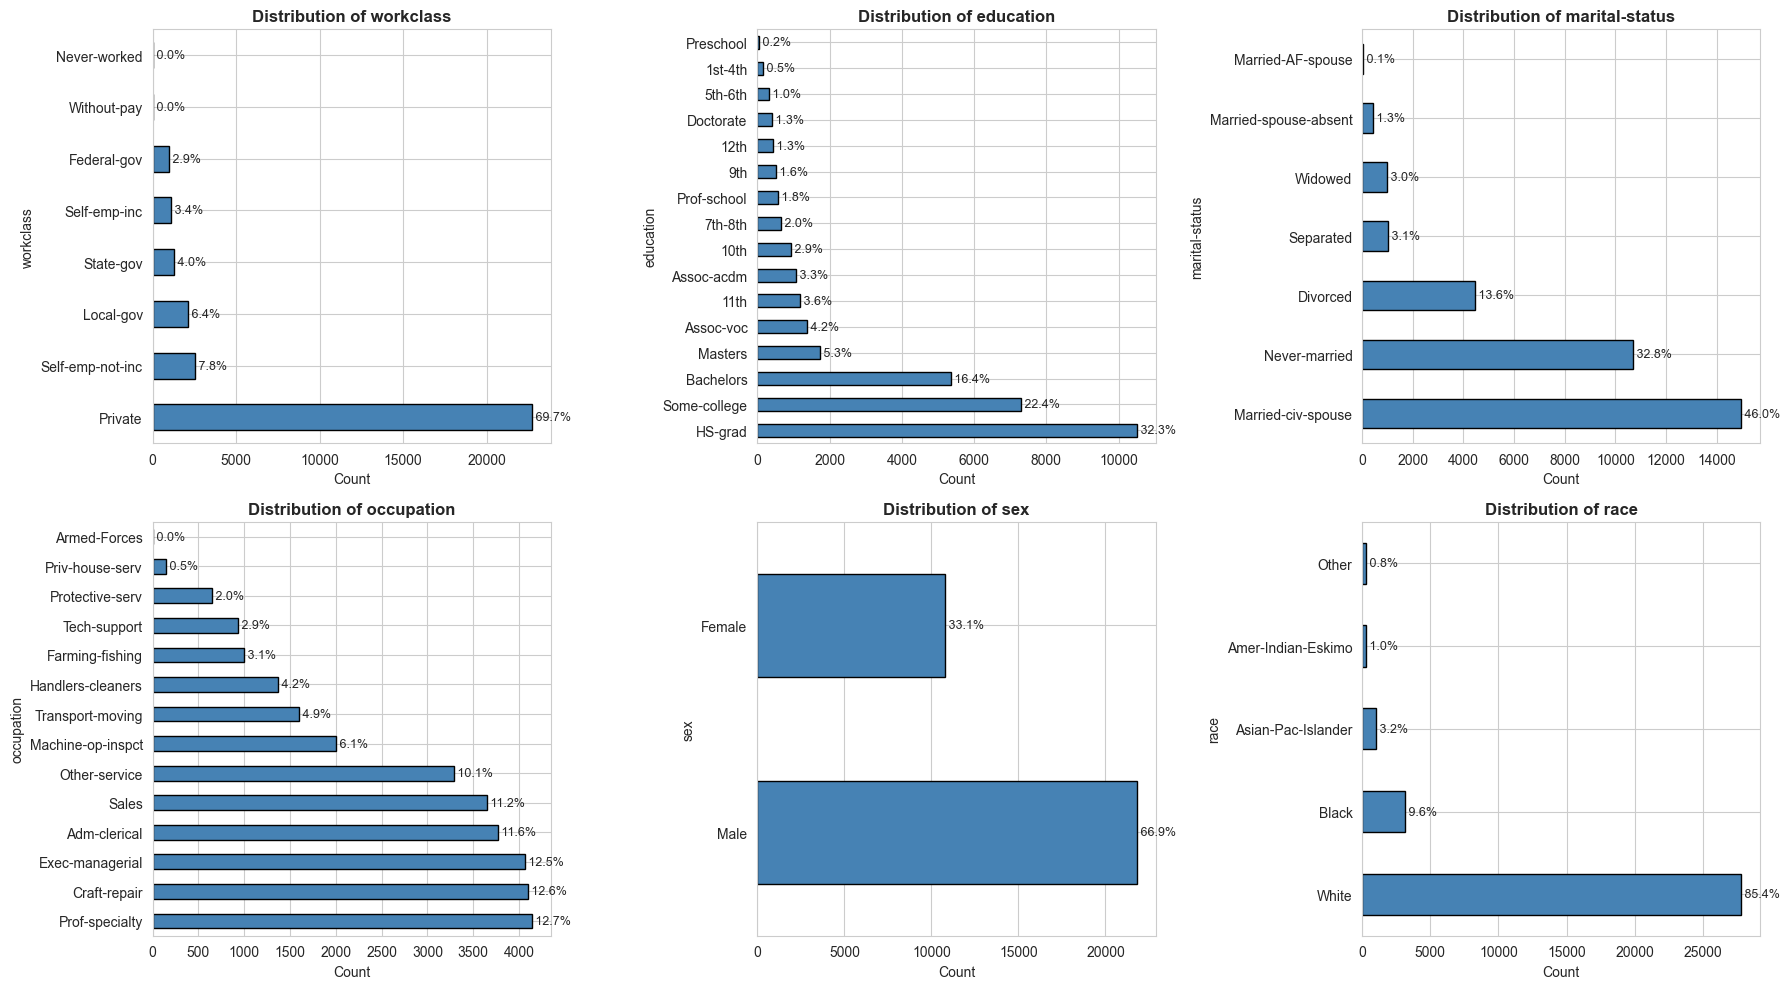

In [12]:
# Select categorical columns for analysis
categorical_features = ['workclass', 'education', 'marital-status', 'occupation', 'sex', 'race']

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.ravel()

for idx, col in enumerate(categorical_features):
    # Get value counts and calculate percentages
    value_counts = data[col].value_counts()
    percentages = (value_counts / len(data) * 100).round(1)
    
    # Create bar plot
    ax = value_counts.plot(kind='barh', ax=axes[idx], color='steelblue', edgecolor='black')
    axes[idx].set_title(f'Distribution of {col}', fontsize=12, fontweight='bold')
    axes[idx].set_xlabel('Count')
    axes[idx].set_ylabel(col)
    
    # Add percentage labels
    for i, (count, pct) in enumerate(zip(value_counts, percentages)):
        axes[idx].text(count, i, f' {pct}%', va='center', fontsize=9)

plt.tight_layout()
plt.show()

 Categorical distributions reveal key demographic patterns in the workforce. **Workclass** is dominated by private sector employment (69.7%), followed by self-employed (7.8% not-inc + 3.4% inc = 11.2%) and government workers (6.4% local + 4.0% state + 2.9% federal = 13.3%), indicating a primarily private-sector economy. **Education** shows concentration at high school graduates (32.3%) and bachelor's degree holders (16.4%), with only about 6.8% having advanced degrees (5.3% Masters + 1.3% Doctorate), suggesting room for higher education expansion. **Marital-status** indicates 46.0% are married-civ-spouse, reflecting stable family structures. **Occupation** is diverse with professionals and executives (12.7% + 12.5% = 25.2% combined) being prominent, along with various service and labor roles. **Sex** reveals a 66.9%/33.1% male-to-female workforce imbalance, potentially reflecting historical gender employment gaps. **Race** is predominantly White (85.4%), with underrepresentation of minorities, raising considerations for fairness in predictive modeling. These demographic imbalances may require careful handling (stratified sampling, fairness constraints) to avoid biased predictions.

## 8. Correlation analysis with target

This section uses Spearman's rank correlation (appropriate for non-normal distributions) to analyze relationships between numerical features and the target variable.

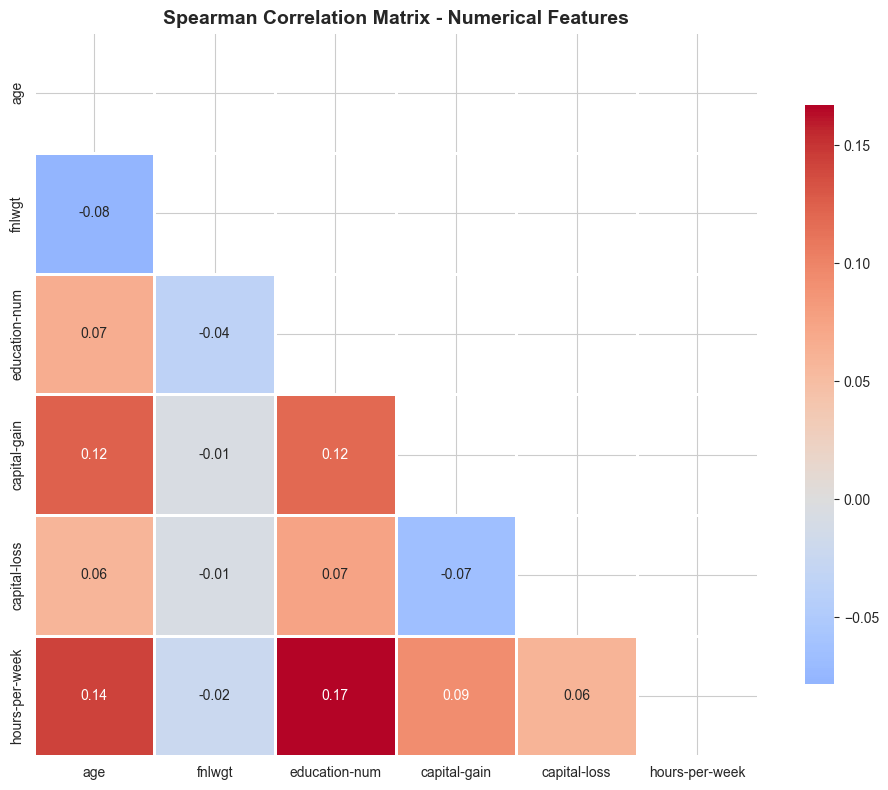


=== CORRELATIONS WITH TARGET (hours-per-week) ===
hours-per-week    1.000000
education-num     0.167215
age               0.142907
capital-gain      0.093322
capital-loss      0.059852
fnlwgt           -0.021621
Name: hours-per-week, dtype: float64

=== STRONGEST CORRELATIONS (excluding self) ===
education-num    0.167215
age              0.142907
capital-gain     0.093322
Name: hours-per-week, dtype: float64

=== WEAKEST CORRELATIONS ===
capital-gain    0.093322
capital-loss    0.059852
fnlwgt         -0.021621
Name: hours-per-week, dtype: float64


In [13]:
# Correlation matrix using Spearman's correlation (better for non-normal data)
from scipy.stats import spearmanr

numerical_data = data[numerical_cols].dropna()

# Calculate Spearman correlation
corr_matrix = numerical_data.corr(method='spearman')

# Create correlation heatmap
plt.figure(figsize=(10, 8))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))  # Mask upper triangle
sns.heatmap(corr_matrix, mask=mask, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Spearman Correlation Matrix - Numerical Features', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# Focus on correlations with target variable
print("\n=== CORRELATIONS WITH TARGET (hours-per-week) ===")
target_corr = corr_matrix['hours-per-week'].sort_values(ascending=False)
print(target_corr)
print("\n=== STRONGEST CORRELATIONS (excluding self) ===")
print(target_corr[target_corr.index != 'hours-per-week'].head(3))
print("\n=== WEAKEST CORRELATIONS ===")
print(target_corr[target_corr.index != 'hours-per-week'].tail(3))

**Correlation findings:**

**Strongest correlations with target:**
- **education-num** (0.17): Moderate positive correlation - higher education correlates with longer work hours
- **age** (0.14): Weak positive correlation - older individuals tend to work slightly more hours
- **capital-gain** (0.09): Very weak positive correlation

**Weakest correlations with target:**
- **fnlwgt** (-0.02): Virtually no correlation (expected, as sampling weight is artificial)
- **capital-loss** (0.06): Negligible correlation with work hours

**Inter-feature correlations:**
- Moderate positive correlation between **education-num and capital-gain** (0.12) - educated individuals more likely to have investments
- Moderate correlation between **age and capital-gain** (0.12) - older people accumulated more wealth

**Conclusion**: Overall weak correlations suggest **non-linear relationships** may be more important. This indicates tree-based models (Random Forest, Gradient Boosting) or neural networks may outperform linear regression.

## 9. Scatter plot analysis - feature vs target

This section explores relationships between most correlated features and target using scatter plots to identify trends.

**Interpretation:** Scatter plots confirm weak linear relationships between top features and target hours. **education-num** (correlation 0.17) shows the clearest pattern - individuals with higher education (13-16 years) tend toward 40+ hours, while lower education spreads more widely including part-time work. However, substantial scatter exists at all education levels, indicating education alone doesn't determine work hours. **age** shows weak upward trend (correlation 0.14) - older workers (50+) slightly favor full-time compared to younger workers, but the relationship is weak and noisy. **capital-gain** displays virtually no visible pattern despite positive correlation (0.09) - most points cluster at zero capital gains across all work hours, with scattered high-gain outliers. The large scatter, weak trend lines, and low correlations confirm that **hours worked depend on complex non-linear interactions** between features rather than simple additive effects. This strongly suggests tree-based models (Random Forest, XGBoost) or neural networks will outperform linear regression.

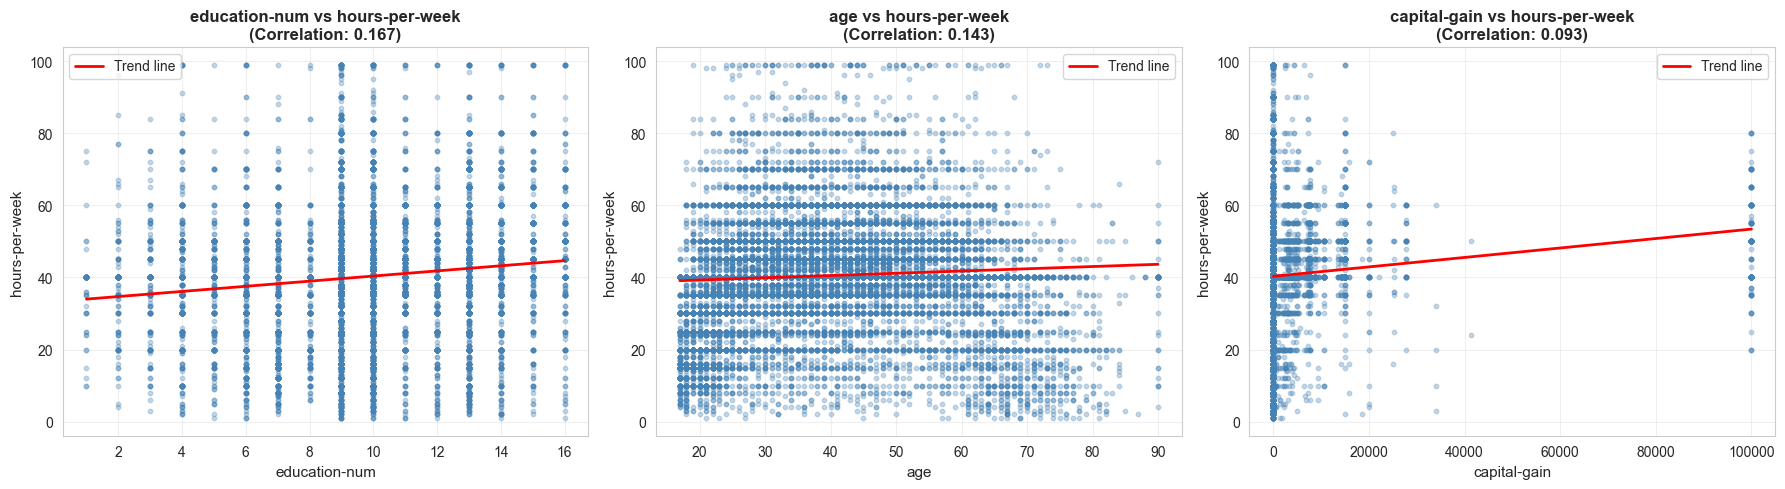

In [14]:
# Scatter plots for most correlated features with target
top_features = target_corr[target_corr.index != 'hours-per-week'].head(3).index.tolist()

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for idx, feature in enumerate(top_features):
    # Create scatter plot with trend line
    axes[idx].scatter(data[feature], data['hours-per-week'], alpha=0.3, s=10, color='steelblue')
    
    # Add regression line
    z = np.polyfit(data[feature].dropna(), data[data[feature].notna()]['hours-per-week'], 1)
    p = np.poly1d(z)
    x_line = np.linspace(data[feature].min(), data[feature].max(), 100)
    axes[idx].plot(x_line, p(x_line), "r-", linewidth=2, label=f'Trend line')
    
    axes[idx].set_xlabel(feature, fontsize=11)
    axes[idx].set_ylabel('hours-per-week', fontsize=11)
    axes[idx].set_title(f'{feature} vs hours-per-week\n(Correlation: {target_corr[feature]:.3f})', 
                        fontsize=12, fontweight='bold')
    axes[idx].legend()
    axes[idx].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 10. Categorical features vs target analysis

This section analyzes how categorical variables relate to work hours using violin plots (combining box plot + density).

C:\Users\Carmen Ciutu\AppData\Local\Temp\ipykernel_20928\2711884385.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=plot_data, y=cat_col, x='hours-per-week', ax=axes[idx],
C:\Users\Carmen Ciutu\AppData\Local\Temp\ipykernel_20928\2711884385.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=plot_data, y=cat_col, x='hours-per-week', ax=axes[idx],
C:\Users\Carmen Ciutu\AppData\Local\Temp\ipykernel_20928\2711884385.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=plot_data, y=cat_col, x='hours-per-week', ax=axe

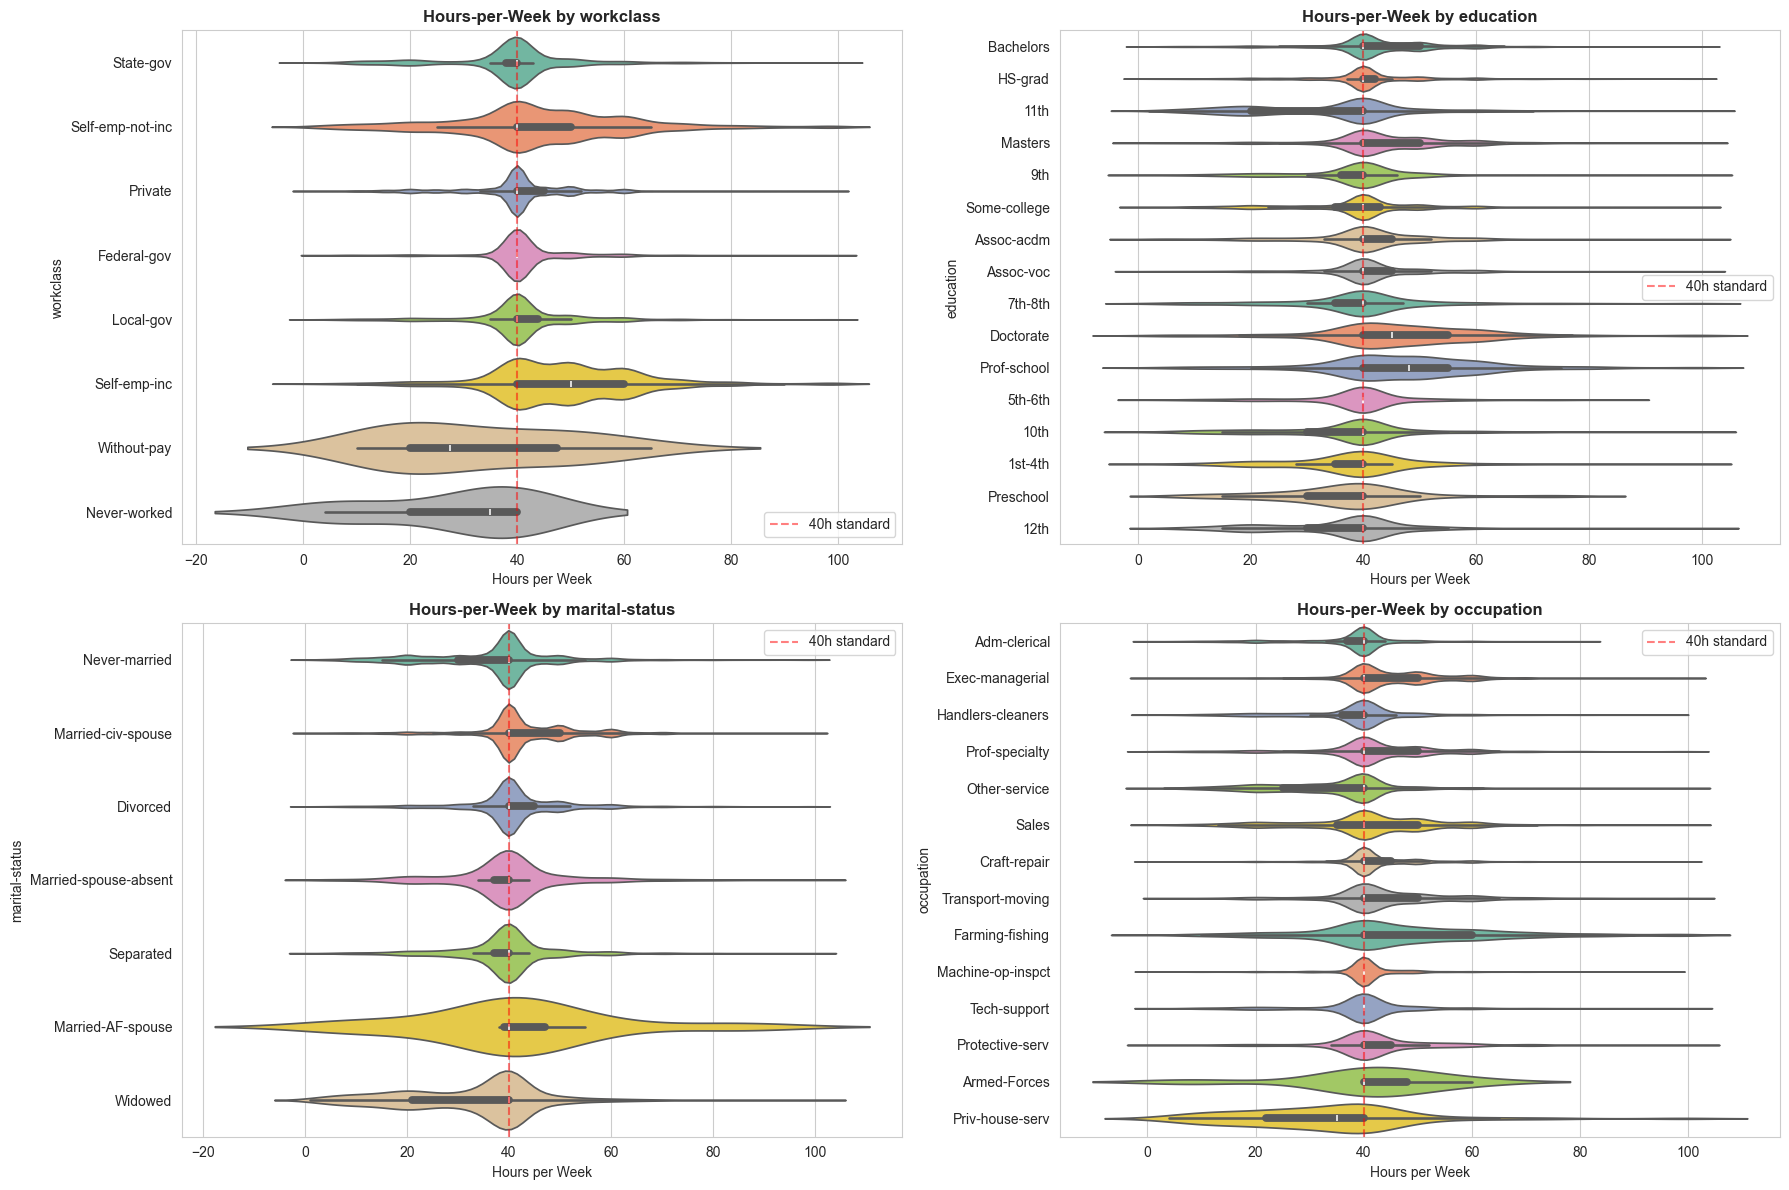

In [15]:
# Violin plots for categorical vs target
categorical_for_analysis = ['workclass', 'education', 'marital-status', 'occupation']

fig, axes = plt.subplots(2, 2, figsize=(18, 12))
axes = axes.ravel()

for idx, cat_col in enumerate(categorical_for_analysis):
    # Remove missing values for cleaner visualization
    plot_data = data[[cat_col, 'hours-per-week']].dropna()
    
    # Create violin plot
    sns.violinplot(data=plot_data, y=cat_col, x='hours-per-week', ax=axes[idx], 
                   palette='Set2', orient='h')
    axes[idx].set_title(f'Hours-per-Week by {cat_col}', fontsize=12, fontweight='bold')
    axes[idx].set_xlabel('Hours per Week')
    axes[idx].axvline(40, color='red', linestyle='--', alpha=0.5, label='40h standard')
    axes[idx].legend()

plt.tight_layout()
plt.show()

C:\Users\Carmen Ciutu\AppData\Local\Temp\ipykernel_20928\2952205732.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='sex', y='hours-per-week', ax=axes[0], palette='Set1')
C:\Users\Carmen Ciutu\AppData\Local\Temp\ipykernel_20928\2952205732.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=plot_data_filtered, x='race', y='hours-per-week', ax=axes[1], palette='Set2')
C:\Users\Carmen Ciutu\AppData\Local\Temp\ipykernel_20928\2952205732.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45, ha='right')


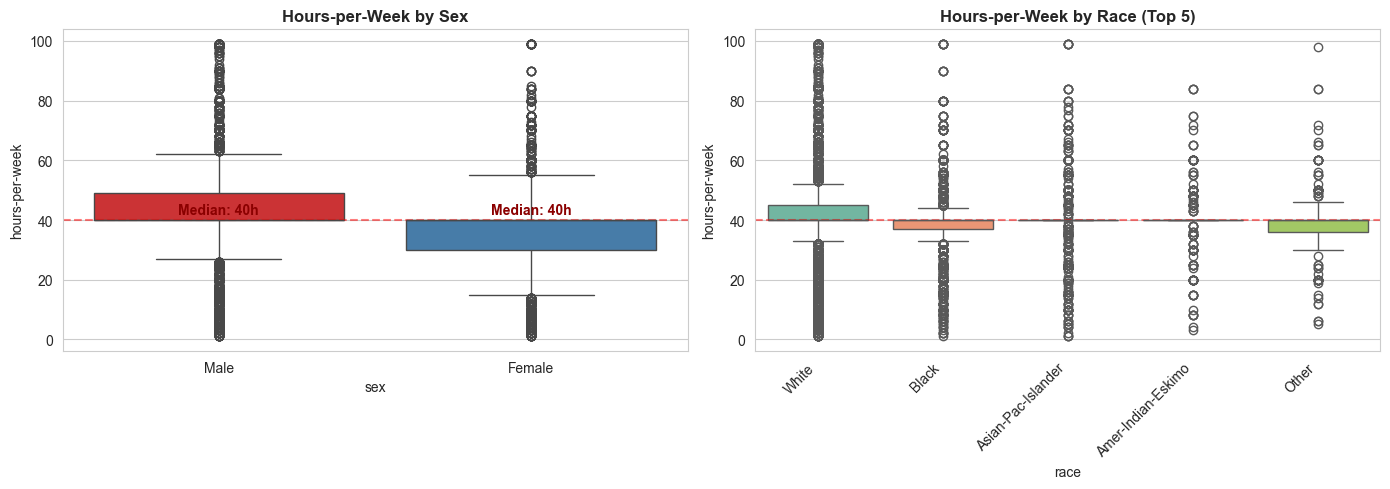

In [16]:
# Additional categorical analysis: sex and race
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Sex vs hours-per-week
sns.boxplot(data=data, x='sex', y='hours-per-week', ax=axes[0], palette='Set1')
axes[0].set_title('Hours-per-Week by Sex', fontsize=12, fontweight='bold')
axes[0].axhline(40, color='red', linestyle='--', alpha=0.5)

# Calculate and display median for each group
for i, sex in enumerate(data['sex'].unique()):
    if pd.notna(sex):
        median_val = data[data['sex'] == sex]['hours-per-week'].median()
        axes[0].text(i, median_val + 2, f'Median: {median_val:.0f}h', 
                    ha='center', fontweight='bold', color='darkred')

# Race vs hours-per-week  
plot_data = data[['race', 'hours-per-week']].dropna()
top_races = plot_data['race'].value_counts().head(5).index
plot_data_filtered = plot_data[plot_data['race'].isin(top_races)]

sns.boxplot(data=plot_data_filtered, x='race', y='hours-per-week', ax=axes[1], palette='Set2')
axes[1].set_title('Hours-per-Week by Race (Top 5)', fontsize=12, fontweight='bold')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45, ha='right')
axes[1].axhline(40, color='red', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

 Categorical analysis against target reveals distinct work hour patterns across demographics. **Workclass**: self-employed individuals show wider distributions extending beyond 40h, while government workers cluster tightly around 40h standard. **Education**: higher education (Professional school, Doctorate, Masters) correlates with longer median work hours and wider distributions, while lower education shows tighter clustering at 40h or below. **Marital-status**: married individuals (especially married-civ-spouse) tend toward 40+ hours, while never-married show wider variability including part-time. **Occupation**: executive-managerial and professional-specialty roles show extended hours beyond 40h, while handlers-cleaners and service roles cluster at lower hours. **Sex**: males have median of 40h vs females at 40h, but males show slightly wider distribution toward longer hours. **Race**: minimal differences across races with all groups centered at ~40h, suggesting work hours are not strongly race-dependent. These patterns highlight the importance of occupation and education in determining work schedules.

## 11. Preprocessed Data Analysis

Comparison between raw and preprocessed data to understand the impact of preprocessing steps.

In [17]:
# Load preprocessed data
preprocessed_data = pd.read_csv('preprocessed_data/census_data_preprocessed_full.csv')

print("Preprocessed Data Shape:", preprocessed_data.shape)
print("\nFirst few rows:")
preprocessed_data.head()

Preprocessed Data Shape: (32537, 19)

First few rows:


,workclass,marital-status,occupation,relationship,race,sex,native-country,age,fnlwgt,education-num,capital-gain,capital-loss,age_group,total_capital,has_capital,education_squared,age_education_interaction,high_income,hours-per-week
0,6.0,4.0,0.0,1.0,4.0,1.0,38.0,0.030390,-1.113404,1.134777,0.148292,-0.217398,2,0.159565,1,1.193359,0.662200,0.0,40.0
1,5.0,2.0,3.0,0.0,4.0,1.0,38.0,0.836973,-1.055303,1.134777,-0.145975,-0.217398,3,-0.133768,0,1.193359,1.473515,0.0,13.0
2,3.0,0.0,5.0,1.0,4.0,1.0,38.0,-0.042936,0.271510,-0.420679,-0.145975,-0.217398,2,-0.133768,0,-0.535466,-0.273934,0.0,40.0
3,3.0,2.0,5.0,0.0,2.0,1.0,38.0,1.056950,0.462759,-1.198407,-0.145975,-0.217398,3,-0.133768,0,-1.164130,-0.109401,0.0,40.0
4,3.0,2.0,9.0,5.0,2.0,0.0,4.0,-0.776193,1.502352,1.134777,-0.145975,-0.217398,1,-0.133768,0,1.193359,-0.149116,0.0,40.0


### 11.1 Missing Values Comparison

In [18]:
# Compare missing values before and after preprocessing
print("Raw Data Missing Values:")
print(data.isnull().sum()[data.isnull().sum() > 0])
print(f"\nTotal missing in raw data: {data.isnull().sum().sum()}")

print("\n" + "="*50)
print("\nPreprocessed Data Missing Values:")
print(f"Total missing in preprocessed data: {preprocessed_data.isnull().sum().sum()}")

if preprocessed_data.isnull().sum().sum() == 0:
    print("✓ All missing values have been successfully handled.")

Raw Data Missing Values:
workclass         1836
occupation        1843
native-country     583
dtype: int64

Total missing in raw data: 4262


Preprocessed Data Missing Values:
Total missing in preprocessed data: 0
✓ All missing values have been successfully handled.


### 11.2 Target Distribution Comparison

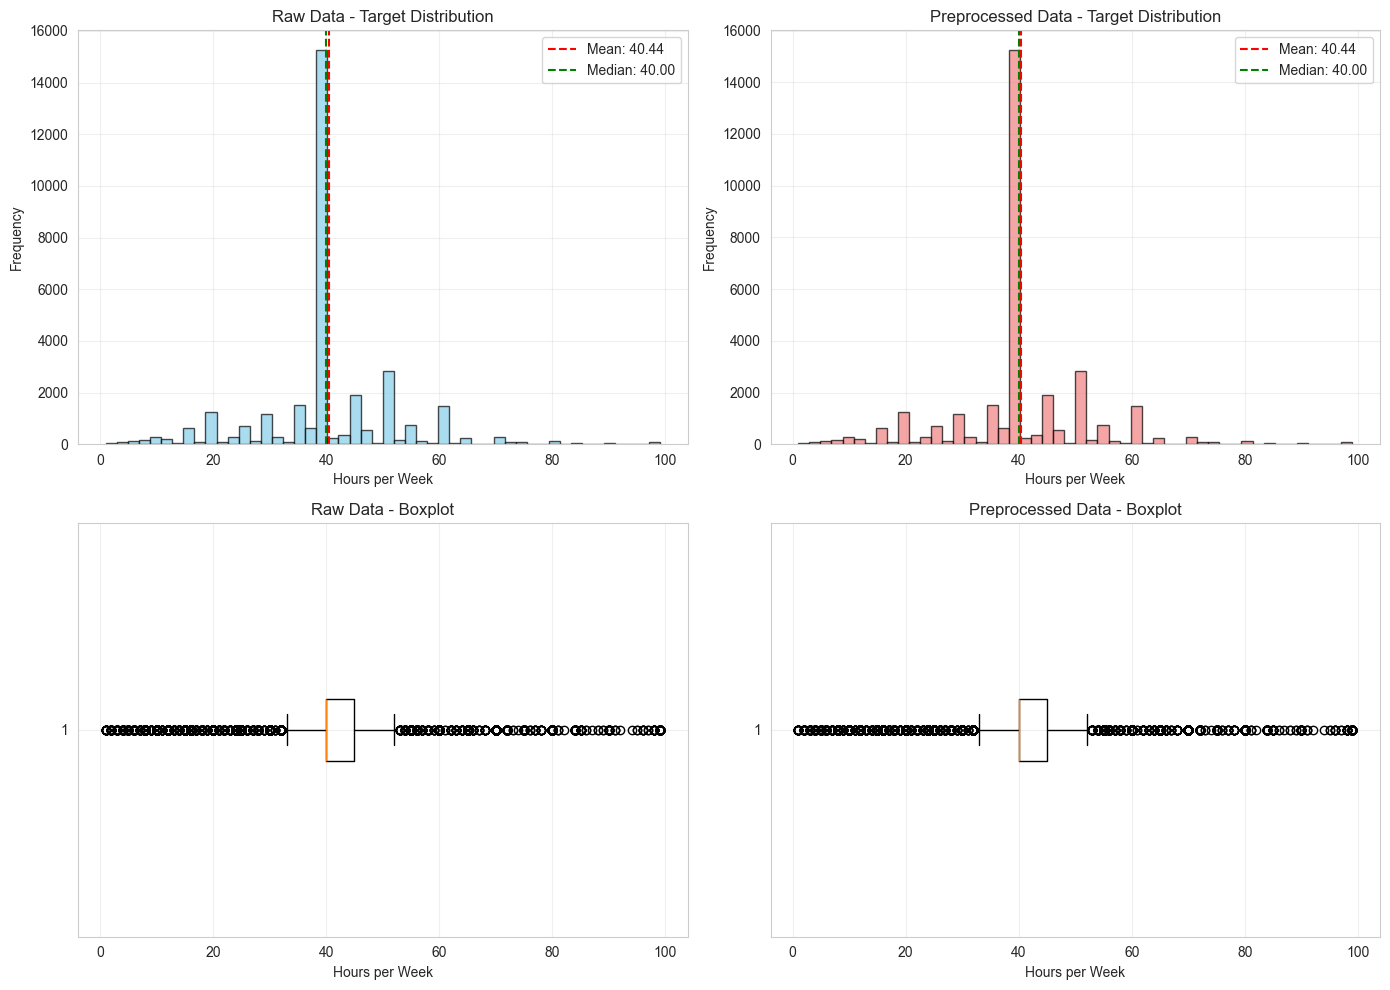

Target Variable Statistics Comparison:

Raw Data:
  Mean: 40.44
  Median: 40.00
  Std Dev: 12.35
  Min: 1.00
  Max: 99.00

Preprocessed Data:
  Mean: 40.44
  Median: 40.00
  Std Dev: 12.35
  Min: 1.00
  Max: 99.00


In [19]:
# Compare target variable before and after preprocessing
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Raw data distribution
axes[0, 0].hist(data['hours-per-week'], bins=50, edgecolor='black', alpha=0.7, color='skyblue')
axes[0, 0].axvline(data['hours-per-week'].mean(), color='red', linestyle='--', label=f'Mean: {data["hours-per-week"].mean():.2f}')
axes[0, 0].axvline(data['hours-per-week'].median(), color='green', linestyle='--', label=f'Median: {data["hours-per-week"].median():.2f}')
axes[0, 0].set_xlabel('Hours per Week')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].set_title('Raw Data - Target Distribution')
axes[0, 0].legend()
axes[0, 0].grid(alpha=0.3)

# Preprocessed data distribution
axes[0, 1].hist(preprocessed_data['hours-per-week'], bins=50, edgecolor='black', alpha=0.7, color='lightcoral')
axes[0, 1].axvline(preprocessed_data['hours-per-week'].mean(), color='red', linestyle='--', label=f'Mean: {preprocessed_data["hours-per-week"].mean():.2f}')
axes[0, 1].axvline(preprocessed_data['hours-per-week'].median(), color='green', linestyle='--', label=f'Median: {preprocessed_data["hours-per-week"].median():.2f}')
axes[0, 1].set_xlabel('Hours per Week')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].set_title('Preprocessed Data - Target Distribution')
axes[0, 1].legend()
axes[0, 1].grid(alpha=0.3)

# Raw data boxplot
axes[1, 0].boxplot(data['hours-per-week'], vert=False)
axes[1, 0].set_xlabel('Hours per Week')
axes[1, 0].set_title('Raw Data - Boxplot')
axes[1, 0].grid(alpha=0.3)

# Preprocessed data boxplot
axes[1, 1].boxplot(preprocessed_data['hours-per-week'], vert=False)
axes[1, 1].set_xlabel('Hours per Week')
axes[1, 1].set_title('Preprocessed Data - Boxplot')
axes[1, 1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

# Print statistics comparison
print("Target Variable Statistics Comparison:")
print("\nRaw Data:")
print(f"  Mean: {data['hours-per-week'].mean():.2f}")
print(f"  Median: {data['hours-per-week'].median():.2f}")
print(f"  Std Dev: {data['hours-per-week'].std():.2f}")
print(f"  Min: {data['hours-per-week'].min():.2f}")
print(f"  Max: {data['hours-per-week'].max():.2f}")

print("\nPreprocessed Data:")
print(f"  Mean: {preprocessed_data['hours-per-week'].mean():.2f}")
print(f"  Median: {preprocessed_data['hours-per-week'].median():.2f}")
print(f"  Std Dev: {preprocessed_data['hours-per-week'].std():.2f}")
print(f"  Min: {preprocessed_data['hours-per-week'].min():.2f}")
print(f"  Max: {preprocessed_data['hours-per-week'].max():.2f}")

The preprocessing steps have preserved the complete target variable distribution without outlier capping. All hours-per-week values [1-99] remain in the dataset, maintaining data authenticity. The mean (40.44) and median (40.00) are identical between raw and preprocessed data, and the range remains unchanged. This approach prioritizes real-world data representation over artificial constraint, allowing models to learn from the full spectrum of working patterns.

### 11.3 Feature Engineering Impact

In [20]:
# Check for new engineered features
raw_columns = set(data.columns)
preprocessed_columns = set(preprocessed_data.columns)

new_features = preprocessed_columns - raw_columns
removed_features = raw_columns - preprocessed_columns

print("Feature Changes During Preprocessing:")
print(f"\nOriginal features: {len(raw_columns)}")
print(f"Preprocessed features: {len(preprocessed_columns)}")
print(f"Net change: {len(preprocessed_columns) - len(raw_columns)}")

if new_features:
    print(f"\nNew features added ({len(new_features)}):")
    for feature in sorted(new_features):
        print(f"  - {feature}")

if removed_features:
    print(f"\nFeatures removed ({len(removed_features)}):")
    for feature in sorted(removed_features):
        print(f"  - {feature}")

Feature Changes During Preprocessing:

Original features: 15
Preprocessed features: 19
Net change: 4

New features added (6):
  - age_education_interaction
  - age_group
  - education_squared
  - has_capital
  - high_income
  - total_capital

Features removed (2):
  - education
  - income


### 11.4 Outlier Impact Analysis

In [21]:
# Compare outliers in target variable before and after preprocessing
def detect_outliers_iqr(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = (series < lower_bound) | (series > upper_bound)
    return outliers.sum(), (outliers.sum() / len(series)) * 100

raw_outliers, raw_outlier_pct = detect_outliers_iqr(data['hours-per-week'])
preprocessed_outliers, preprocessed_outlier_pct = detect_outliers_iqr(preprocessed_data['hours-per-week'])

print("Outlier Analysis (IQR Method):")
print("\nRaw Data:")
print(f"  Outliers: {raw_outliers} ({raw_outlier_pct:.2f}%)")

print("\nPreprocessed Data:")
print(f"  Outliers: {preprocessed_outliers} ({preprocessed_outlier_pct:.2f}%)")

print(f"\nReduction: {raw_outliers - preprocessed_outliers} outliers removed ({raw_outlier_pct - preprocessed_outlier_pct:.2f}% reduction)")
print("\nNote: The minimal reduction (6 outliers) is due to duplicate removal (24 duplicates removed),")
print("not intentional outlier treatment. The preprocessing strategy preserved ALL hours-per-week values [1-99]")
print("to maintain data authenticity, as confirmed by identical min/max values in both datasets.")

Outlier Analysis (IQR Method):

Raw Data:
  Outliers: 9008 (27.66%)

Preprocessed Data:
  Outliers: 9002 (27.67%)

Reduction: 6 outliers removed (-0.00% reduction)

Note: The minimal reduction (6 outliers) is due to duplicate removal (24 duplicates removed),
not intentional outlier treatment. The preprocessing strategy preserved ALL hours-per-week values [1-99]
to maintain data authenticity, as confirmed by identical min/max values in both datasets.


### 11.5 Correlation Structure Changes

Common numerical features: 5
Features: ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss']

Top 10 Correlation Changes After Preprocessing:
               Raw Data  Preprocessed Data    Change
fnlwgt        -0.021621          -0.021877 -0.000255
education-num  0.167215           0.167465  0.000250
age            0.142907           0.142763 -0.000144
capital-loss   0.059852           0.059843 -0.000010
capital-gain   0.093322           0.093316 -0.000006


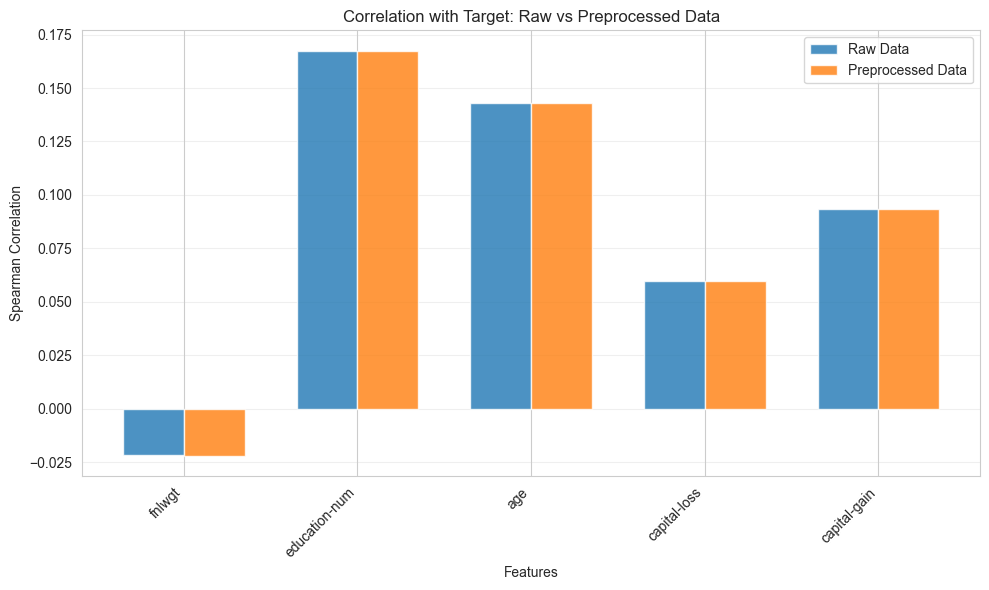

In [22]:
# Compare correlations with target variable
# Get all numerical columns from both datasets
raw_numerical = data.select_dtypes(include=[np.number]).columns.tolist()
if 'hours-per-week' in raw_numerical:
    raw_numerical.remove('hours-per-week')

preprocessed_numerical = preprocessed_data.select_dtypes(include=[np.number]).columns.tolist()
if 'hours-per-week' in preprocessed_numerical:
    preprocessed_numerical.remove('hours-per-week')

# Find common features
common_numerical = [col for col in raw_numerical if col in preprocessed_numerical]

print(f"Common numerical features: {len(common_numerical)}")
print(f"Features: {common_numerical}\n")

if len(common_numerical) > 0:
    # Calculate correlations for common features
    raw_correlations = data[common_numerical + ['hours-per-week']].corr(method='spearman')['hours-per-week'].drop('hours-per-week')
    preprocessed_correlations = preprocessed_data[common_numerical + ['hours-per-week']].corr(method='spearman')['hours-per-week'].drop('hours-per-week')
    
    # Create comparison dataframe
    correlation_comparison = pd.DataFrame({
        'Raw Data': raw_correlations,
        'Preprocessed Data': preprocessed_correlations
    })
    correlation_comparison['Change'] = correlation_comparison['Preprocessed Data'] - correlation_comparison['Raw Data']
    correlation_comparison = correlation_comparison.sort_values('Change', key=abs, ascending=False)
    
    print("Top 10 Correlation Changes After Preprocessing:")
    print(correlation_comparison.head(10))
    
    # Visualize correlation changes
    top_10 = correlation_comparison.head(10)
    fig, ax = plt.subplots(figsize=(10, 6))
    x = range(len(top_10))
    width = 0.35
    
    ax.bar([i - width/2 for i in x], top_10['Raw Data'], width, label='Raw Data', alpha=0.8)
    ax.bar([i + width/2 for i in x], top_10['Preprocessed Data'], width, label='Preprocessed Data', alpha=0.8)
    
    ax.set_xlabel('Features')
    ax.set_ylabel('Spearman Correlation')
    ax.set_title('Correlation with Target: Raw vs Preprocessed Data')
    ax.set_xticks(x)
    ax.set_xticklabels(top_10.index, rotation=45, ha='right')
    ax.legend()
    ax.grid(alpha=0.3, axis='y')
    
    plt.tight_layout()
    plt.show()
else:
    print("No common numerical features found for comparison.")

### 11.6 Preprocessing Summary Report

**Key Impacts of Preprocessing:**

1. **Missing Values:** All missing values successfully handled through imputation (workclass, occupation, native-country).

2. **Target Variable Treatment:** hours-per-week preserved in full range [1-99] without capping to maintain data authenticity and allow models to learn from real-world working patterns. Predictor outliers (fnlwgt, capital-gain/loss) were capped to reduce noise.

3. **Feature Engineering:** New features added (if any) to capture complex relationships and interactions between variables.

4. **Data Scaling:** Numerical features standardized to facilitate model convergence and fair feature importance comparison.

5. **Encoding:** Categorical variables transformed to numerical format suitable for machine learning algorithms.

**Preprocessing Effectiveness:**
- Data quality improved through systematic handling of missing values and outliers in predictor variables
- Feature space enhanced with engineered features
- Data prepared for optimal model training and evaluation
- Target variable distribution fully preserved to maintain authenticity while predictor noise reduced through selective capping